In [131]:
import pandas as pd
import numpy as np
import math

### Carga dos dados

In [132]:
# definir arquivo Pickle de entrada
#arquivo = 'dados/afastamentos-nomes-sexo-preparado.pkl.bz2'
arquivo = 'dados/cadastro-nomes-sexo-preparado.pkl.bz2'
#arquivo = 'extra/nome_sexo_pf-preparado.pkl.bz2'

In [133]:
df = pd.read_pickle(arquivo)
df.head()

,SEXO,QTDE,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
NOME,,,,,,,,,,,,,,,,,,
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
JOSE,1,15925,5,19,15,10,0,0,0,0,0,0,0,0,0,0,0,0
ANA,0,11497,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0
JOAO,1,7515,15,1,15,10,0,0,0,0,0,0,0,0,0,0,0,0
CARLOS,1,7370,19,15,12,18,1,3,0,0,0,0,0,0,0,0,0,0


In [134]:
df.shape

(41146, 18)

### Expansão dos dados agregados

In [135]:
%%time
df2 = df.head(50000).copy()
#df2 = df.copy()
menor = df2['QTDE'].min()
maior = df2['QTDE'].max()
print(df2.shape[0], menor, maior, math.ceil(np.sqrt(maior / menor)))
#df2['TAM'] = df2['QTDE'].apply(lambda x: math.ceil(np.sqrt(x / menor)))
df2['TEMP'] = df2[['SEXO', 'QTDE']].apply(
    lambda x: [x[0]] * math.ceil(np.sqrt(x[1] / menor)), axis=1)
dfe = df2.explode('TEMP').drop(['TEMP'], axis=1) #.reset_index()
dfe.head(1000)

41146 1 20389 143
CPU times: user 407 ms, sys: 0 ns, total: 407 ms
Wall time: 405 ms


,SEXO,QTDE,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
NOME,,,,,,,,,,,,,,,,,,
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
MARIA,0,20389,1,9,18,1,13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MARCOS,1,4542,19,15,3,18,1,13,0,0,0,0,0,0,0,0,0,0
MARCOS,1,4542,19,15,3,18,1,13,0,0,0,0,0,0,0,0,0,0
MARCOS,1,4542,19,15,3,18,1,13,0,0,0,0,0,0,0,0,0,0


In [136]:
# usar os dados expandidos invés dos agregados
dfo = df # guardar o dataframe original
df = dfe # apontar para o dataframe expandido

### Uso dos dados originais

In [137]:
X = df.drop(['SEXO', 'QTDE'], axis=1) # tudo, exceto a coluna alvo
y = df['SEXO'] # apenas a coluna alvo
print('Forma dos dados:', X.shape, y.shape)

Forma dos dados: (82709, 16) (82709,)


In [138]:
# dividir dados em treino, validação e teste

TRAIN_RATIO = 0.75
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.10

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=(1 - TRAIN_RATIO))

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=(TEST_RATIO / (TEST_RATIO + VALIDATION_RATIO)))

print("Shapes:\n"\
      "   Train      - X: %s, y: %s\n" \
      "   Validation - X: %s, y: %s\n" \
      "   Test       - X: %s, y: %s" %
      (X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape))

Shapes:
   Train      - X: (62031, 16), y: (62031,)
   Validation - X: (12406, 16), y: (12406,)
   Test       - X: (8272, 16), y: (8272,)


In [139]:
X_train.head()

,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15
NOME,,,,,,,,,,,,,,,,
PAULECIA,1,9,3,5,12,21,1,16,0,0,0,0,0,0,0,0
LENISE,5,19,9,14,5,12,0,0,0,0,0,0,0,0,0,0
GABRIELE,5,12,5,9,18,2,1,7,0,0,0,0,0,0,0,0
ILCELENA,1,14,5,12,5,3,12,9,0,0,0,0,0,0,0,0
ABSON,14,15,19,2,1,0,0,0,0,0,0,0,0,0,0,0


In [140]:
y_train.head()

NOME
PAULECIA    0
LENISE      0
GABRIELE    0
ILCELENA    0
ABSON       1
Name: SEXO, dtype: uint8

In [141]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy

In [161]:
# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(n_features,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
model.summary()

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
#model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='sgd', loss='mse', metrics=[BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_28 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [162]:
%%time

# fit the model
his = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_data=(X_val, y_val))
#model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

CPU times: user 4min 13s, sys: 17.1 s, total: 4min 30s
Wall time: 2min 26s


In [163]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia: %.2f %%' % (acc * 100))

Acurácia: 95.16 %


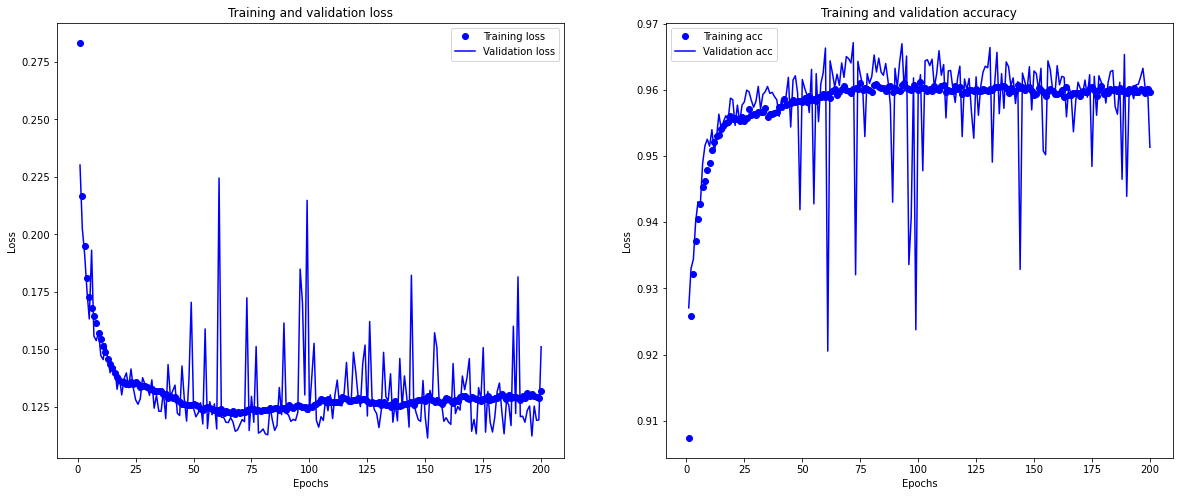

In [164]:
# Plotting the training and validation loss and accuracy
import matplotlib.pyplot as plt

# Figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

history_dict = his.history
keys = list(history_dict.keys())

loss_values = history_dict[keys[0]] # loss
val_loss_values = history_dict[keys[2]] # val_loss
epochs = range(1, len(history_dict[keys[0]]) + 1)

ax1.plot(epochs, loss_values, 'bo', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation loss')
ax1.set(title = 'Training and validation loss',
        xlabel = 'Epochs',
        ylabel = 'Loss')
ax1.legend()

acc_values = history_dict[keys[1]] # accuracy
val_acc_values = history_dict[keys[3]] # val_accuracy

ax2.plot(epochs, acc_values, 'bo', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.set(title = 'Training and validation accuracy',
        xlabel = 'Epochs',
        ylabel = 'Loss')
ax2.legend()

plt.show()

In [165]:
# dividir dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("Shapes:\n"\
      "   Train      - X: %s, y: %s\n" \
      "   Test       - X: %s, y: %s" %
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shapes:
   Train      - X: (57896, 16), y: (57896,)
   Test       - X: (24813, 16), y: (24813,)


In [166]:
%%time

# fit the model
model.fit(X_train, y_train, epochs=60, batch_size=32, verbose=0)

CPU times: user 1min 6s, sys: 4.41 s, total: 1min 10s
Wall time: 37.6 s


In [167]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia: %.2f %%' % (acc * 100))

Acurácia: 95.74 %


In [168]:
# save model to file
model.save('modelos/modelo-genero-nome-tensorflow.h5')

In [169]:
df2 = X_test.copy()
df2['PROB'] = model.predict(X_test)
df2['REAL'] = y_test
df2['PREV'] = df2['PROB'].apply(lambda x: 1 if x > 0.5 else 0)
df2['DIF'] = df2[['REAL', 'PREV']].apply(lambda x: abs(x[0] - x[1]), axis=1)
#df2['REAL'].apply(lambda x: 'F' if x else 'M')
#df2['PREV'].apply(lambda x: 'F' if x else 'M')
df2.head(15)

,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,PROB,REAL,PREV,DIF
NOME,,,,,,,,,,,,,,,,,,,,
LICIO,15,9,3,9,12,0,0,0,0,0,0,0,0,0,0,0,9.814277e-01,1,1,0
SOLANGE,5,7,14,1,12,15,19,0,0,0,0,0,0,0,0,0,2.713457e-05,0,0,0
BERTHA,1,8,20,18,5,2,0,0,0,0,0,0,0,0,0,0,1.372171e-09,0,0,0
VALDENILDA,1,4,12,9,14,5,4,12,1,22,0,0,0,0,0,0,0.000000e+00,0,0,0
JUVANETE,5,20,5,14,1,22,21,10,0,0,0,0,0,0,0,0,5.745590e-04,0,0,0
THAISA,1,19,9,1,8,20,0,0,0,0,0,0,0,0,0,0,4.647027e-05,0,0,0
OLINTO,15,20,14,9,12,15,0,0,0,0,0,0,0,0,0,0,9.998976e-01,1,1,0
TRICIA,1,9,3,9,18,20,0,0,0,0,0,0,0,0,0,0,2.046335e-05,0,0,0
SANANE,5,14,1,14,1,19,0,0,0,0,0,0,0,0,0,0,4.907787e-03,0,0,0


In [170]:
df2[df2['DIF'] > 0].head(15)

,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,PROB,REAL,PREV,DIF
NOME,,,,,,,,,,,,,,,,,,,,
THAIS,19,9,1,8,20,0,0,0,0,0,0,0,0,0,0,0,0.541902,0,1,1
WALENBERG,7,18,5,2,14,5,12,1,23,0,0,0,0,0,0,0,0.281154,1,0,1
MELQUE,5,21,17,12,5,13,0,0,0,0,0,0,0,0,0,0,0.230484,1,0,1
CALIOPE,5,16,15,9,12,1,3,0,0,0,0,0,0,0,0,0,0.274591,1,0,1
THAIS,19,9,1,8,20,0,0,0,0,0,0,0,0,0,0,0,0.541902,0,1,1
PHILIPPE,5,16,16,9,12,9,8,16,0,0,0,0,0,0,0,0,0.353986,1,0,1
KELEN,14,5,12,5,11,0,0,0,0,0,0,0,0,0,0,0,0.604637,0,1,1
CLEYSE,5,19,25,5,12,3,0,0,0,0,0,0,0,0,0,0,0.616301,0,1,1
GEISEBEL,12,5,2,5,19,9,5,7,0,0,0,0,0,0,0,0,0.450474,1,0,1
